### Variables categoricas ordinales

In [63]:
import pandas as pd
import numpy as np
data = pd.read_csv('data_4_2.csv')

In [64]:
data.head()

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


1. Sustituya los datos de la variable categórica por los coeficientes de un polinomio lineal cuya suma sea cero.

In [65]:
#categorías
categorias = data.Escolaridad.unique()
print(categorias)
categorias_ordenadas = [categorias[3], categorias[0], categorias[-1], categorias[1], categorias[2]]
print(categorias_ordenadas)
n = len(categorias)

# Definimos la variable independiente 'x'
bg=n-1 if n%2==0 else (n-1)//2
st=2 if n%2==0 else 1
x=range(-bg,bg+1,st)
for i in x:
  print(i)

m=1/np.sqrt(sum(np.power(x, 2)))
p1={c:m*i for c,i in zip(categorias_ordenadas,x)}
print(p1)

suma=0
for v in p1.values():
  suma += v
print(suma)

data['Pronóstico_Lin'] = data['Escolaridad'].map(p1)
data.head()

['Primaria trunca' 'Secundaria' 'Preparatoria' 'Sin escolaridad'
 'Primaria']
['Sin escolaridad', 'Primaria trunca', 'Primaria', 'Secundaria', 'Preparatoria']
-2
-1
0
1
2
{'Sin escolaridad': -0.6324555320336759, 'Primaria trunca': -0.31622776601683794, 'Primaria': 0.0, 'Secundaria': 0.31622776601683794, 'Preparatoria': 0.6324555320336759}
1.1102230246251565e-16


,Escolaridad,No. de hijos,Pronóstico_Lin
0,Primaria trunca,9,-0.316228
1,Secundaria,3,0.316228
2,Preparatoria,2,0.632456
3,Sin escolaridad,3,-0.632456
4,Primaria,2,0.000000


2. Muestre en un gráfico la escolaridad contra el número de hijos usando la función *scatter* de *matplotlib.pyplot*.

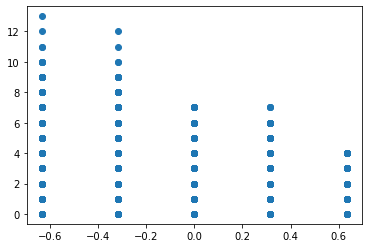

In [66]:
import matplotlib.pyplot as plt
plt.scatter(data['Pronóstico_Lin'], data['No. de hijos'])


3. Sustituya ahora la variable categórica por los coeficientes de un polinomio cuadrático cuya suma sea cero.

In [67]:
# Codificación cuadrática
a0=-1
a1=0
a2=-n*a0/sum([i**2 for i in x])
p2={c:a0+a1*i+a2*i**2 for c,i in zip(categorias_ordenadas,x)}
p2

suma=0
for v in p2.values():
  suma+=v
suma

data['Pronóstico_Cua'] = data['Escolaridad'].map(p2)
data.head()

,Escolaridad,No. de hijos,Pronóstico_Lin,Pronóstico_Cua
0,Primaria trunca,9,-0.316228,-0.5
1,Secundaria,3,0.316228,-0.5
2,Preparatoria,2,0.632456,1.0
3,Sin escolaridad,3,-0.632456,1.0
4,Primaria,2,0.000000,-1.0


4. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la $X=\{Escolaridad\_1, Escolaridad\_2\}$ y $Y=No.de\_hijos$.

Donde $Escolaridad\_1$ es la codificación con coeficientes de grado uno y $Escolaridad\_2$ es la codificación con los coeficientes de grado dos.

In [68]:
from sklearn.linear_model import LinearRegression
X = data[['Pronóstico_Lin','Pronóstico_Cua']]
y = data['No. de hijos']
reg = LinearRegression().fit(X, y)
print(reg.coef_, reg.intercept_)
y_pred = reg.predict(X)

[-1.64545267  0.15970697] 3.0265188826656924


5. Realice dos gráficas (con `scatter`) de la relación obtenida proyectando la predicción en cada codificación de la variable Escolaridad.

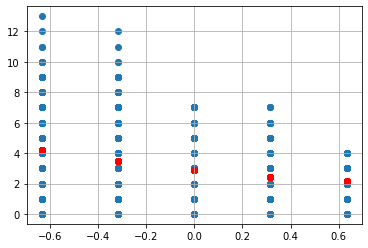

In [69]:
plt.scatter(X['Pronóstico_Lin'],y)
plt.scatter(X['Pronóstico_Lin'],y_pred,c='r')
plt.grid()

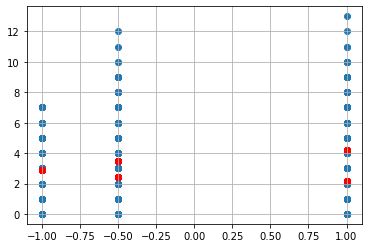

In [70]:
plt.scatter(X['Pronóstico_Cua'],y)
plt.scatter(X['Pronóstico_Cua'],y_pred,c='r')
plt.grid()